## Classification task

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [3]:
### Helper functions
#plotPerColumnDistribution(df, nGraphShown, nGraphPerRow)
#plotCorrelationMatrix(df, graphWidth)
#plotScatterMatrix(df, plotSize, textSize)

### Getting CUP data into dataframe

In [4]:
import cv2
import glob

imdir = 'coffee_cup/images/'
ext = ['png', 'jpg', 'gif']    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

cup_images = [cv2.imread(file) for file in files]

In [5]:
max_size = 0
for i, img in enumerate(cup_images):
    w, h,_ = img.shape
    if w>max_size:
        max_size=w
    if h>max_size:
        max_size=h
print(max_size)

1024


**SO the cups are not square**
- We can strecth or pad the images.
- Padding seems more safe as the final testing will have noise and occlusion anyways.

In [6]:
def alter_images(images, max_size, padding=False, output_size=128):
    altered_images = []
    for i, img in enumerate(images): # Resize
        # resize image
        w, h,_ = img.shape
        # Grayscale image
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        if padding:
            # Add padding
            top=0
            bottom=max_size-h
            left=0
            right=max_size-w
            borderType=cv2.BORDER_CONSTANT # cv2.BORDER_WRAP
            img_gray = cv2.copyMakeBorder(img_gray, top, bottom, left, right, borderType)
        # Finally We want a fixed-size image for input to ML
        altered_images.append(cv2.resize(img_gray, (output_size, output_size), interpolation = cv2.INTER_AREA))
    return altered_images   

cup_altered_images=alter_images(cup_images, max_size)

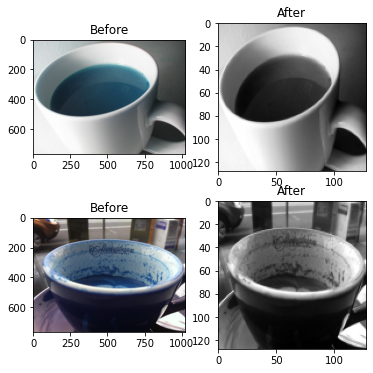

In [7]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(6, 6))
axs[0, 0].imshow(cup_images[0])
axs[0, 0].set_title("Before")
axs[0, 1].imshow(cup_altered_images[0], cmap="gray")
axs[0, 1].set_title("After")
axs[1, 0].imshow(cup_images[1])
axs[1, 0].set_title("Before")
axs[1, 1].imshow(cup_altered_images[1], cmap="gray")
axs[1, 1].set_title("After");


In [18]:
df1 = pd.DataFrame({'Images':cup_altered_images, 'label': 0})
df1

,Images,label
0,"[[206, 203, 208, 209, 206, 203, 206, 205, 209,...",0
1,"[[220, 204, 172, 127, 108, 102, 107, 105, 101,...",0
2,"[[52, 53, 60, 63, 85, 81, 78, 46, 15, 18, 11, ...",0
3,"[[24, 30, 29, 31, 38, 38, 40, 43, 44, 48, 45, ...",0
4,"[[223, 222, 222, 224, 223, 223, 217, 221, 222,...",0
...,...,...
96,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
97,"[[63, 65, 68, 68, 67, 60, 34, 25, 26, 27, 26, ...",0
98,"[[84, 89, 91, 92, 96, 97, 100, 103, 109, 114, ...",0
99,"[[171, 177, 183, 189, 194, 197, 204, 207, 214,...",0


### Now add cardboard images as well!

In [19]:
imdir = 'cardboard/images/'
ext = ['png', 'jpg', 'gif']    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

cb_images = [cv2.imread(file) for file in files]

In [20]:
max_size = 0
for i, img in enumerate(cup_images):
    w, h,_ = img.shape
    if w>max_size:
        max_size=w
    if h>max_size:
        max_size=h
print(max_size)
cb_altered_images=alter_images(cb_images, max_size)

1024


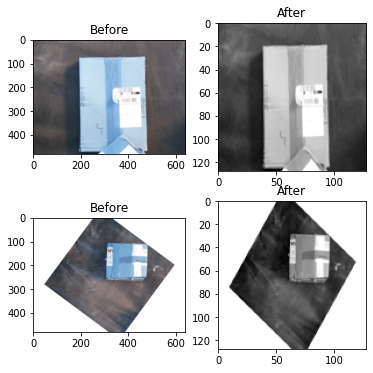

In [21]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(6, 6))
axs[0, 0].imshow(cb_images[0])
axs[0, 0].set_title("Before")
axs[0, 1].imshow(cb_altered_images[0], cmap="gray")
axs[0, 1].set_title("After")
axs[1, 0].imshow(cb_images[1])
axs[1, 0].set_title("Before")
axs[1, 1].imshow(cb_altered_images[1], cmap="gray")
axs[1, 1].set_title("After");


In [22]:
df2 = pd.DataFrame({'Images':cb_altered_images, 'label': 1})
df2

,Images,label
0,"[[90, 90, 91, 93, 95, 98, 95, 101, 114, 107, 1...",1
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",1
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",1
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",1
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",1
...,...,...
174,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",1
175,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",1
176,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",1
177,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",1


In [23]:
frames = [df1, df2,]
df = pd.concat(frames)

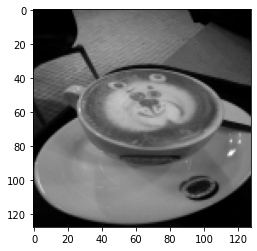

In [43]:
#Extract one piece of data
plt.imshow(df["Images"].iloc[14], cmap="gray");

### Make a PCA dataframe as well

In [70]:
from sklearn.decomposition import PCA

# Flatten cup
flat_cup = []
for i,matrix in enumerate(cup_altered_images):
    flat_cup.append(matrix.flatten())
flat_cup=np.asarray(flat_cup)
print(flat_cup.shape)

# Flatten cb
flat_cb = []
for i,matrix in enumerate(cb_altered_images):
    flat_cb.append(matrix.flatten())
flat_cb=np.asarray(flat_cb)
print(flat_cb.shape)


(101, 16384)
(179, 16384)


In [81]:
pca_cup = PCA(n_components = 81) # We only need two first principle components (2D space)
pca_cb = PCA(n_components = 81) # We only need two first principle components (2D space)

cup_reduced = pca_cup.fit_transform(flat_cup)
cb_reduced = pca_cb.fit_transform(flat_cb)

# Normalize
from sklearn.preprocessing import StandardScaler, MinMaxScaler
cup_reduced_scaled = MinMaxScaler().fit_transform(cup_reduced)
cb_reduced_scaled = MinMaxScaler().fit_transform(cb_reduced)


print("Cup PCA:",sum(pca_cup.explained_variance_ratio_))
print("Cb PCA:",sum(pca_cb.explained_variance_ratio_))



Cup PCA: 0.9840347012842814
Cb PCA: 0.9838073860645652


In [82]:
dfcup_pca = pd.DataFrame({'PCA': list(cup_reduced_scaled), 'label': 0})
dfcb_pca = pd.DataFrame({'PCA': list(cb_reduced_scaled), 'label': 1})

frames = [dfcup_pca, dfcb_pca,]
df_PCA = pd.concat(frames)
df_PCA

,PCA,label
0,"[0.618916201056075, 0.43618039825355515, 0.668...",0
1,"[0.39844210730395296, 0.1560896272506191, 0.53...",0
2,"[0.5402899807661239, 0.4169487256324411, 0.430...",0
3,"[0.3645995368487739, 0.08580603923415175, 0.48...",0
4,"[0.45827083236303856, 0.1283076288553439, 0.61...",0
...,...,...
174,"[0.32906024485322777, 0.5350106929727091, 0.62...",1
175,"[0.21312798942946276, 0.6911893892488904, 0.53...",1
176,"[0.16464621126620643, 0.5989706124250752, 0.45...",1
177,"[0.024029562837750817, 0.37104896710122376, 0....",1


## Classification

### First attempt: SVM on PCA reduced data. No validation split

In [86]:
from sklearn import datasets, svm, metrics
########## PARAMETERS #########
C = 1.0                     ### 
gamma = "scale" #Default    ### 
######## PARAMETERS ###########

#rbf_svc_classifier = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(df_PCA["PCA"], df_PCA["label"])

### Second attempt: ANN!

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

In [ ]:
# Model 1
model = tf.keras.Sequential()
model.add(layers.Dense(X_train.shape[-1], activation=tf.nn.relu))
model.add(layers.Dense(64, activation=tf.nn.relu))
model.add(layers.Dense(10, activation=tf.nn.softmax)) 

model.compile(optimizer=keras.optimizers.Adam(),
              loss=tf.keras.metrics.sparse_categorical_crossentropy,
              metrics=['accuracy']
              )

history = model.fit(x=X_scaled, y=np.float32(targets),
                    epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

model.summary()